(4746, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None
    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800      

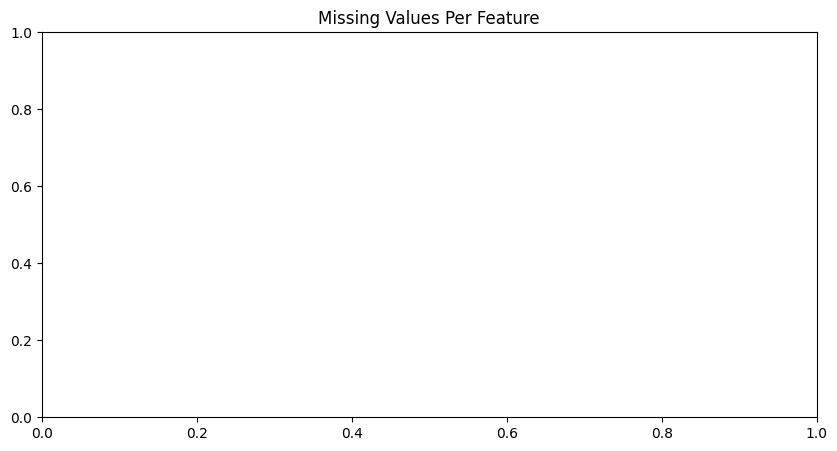


Summary Statistics:
            count          mean           std     min      25%      50%  \
BHK       4746.0      2.083860      0.832256     1.0      2.0      2.0   
Rent      4746.0  34993.451327  78106.412937  1200.0  10000.0  16000.0   
Size      4746.0    967.490729    634.202328    10.0    550.0    850.0   
Bathroom  4746.0      1.965866      0.884532     1.0      1.0      2.0   

              75%        max  
BHK           3.0        6.0  
Rent      33000.0  3500000.0  
Size       1200.0     8000.0  
Bathroom      2.0       10.0  


<Figure size 800x500 with 0 Axes>

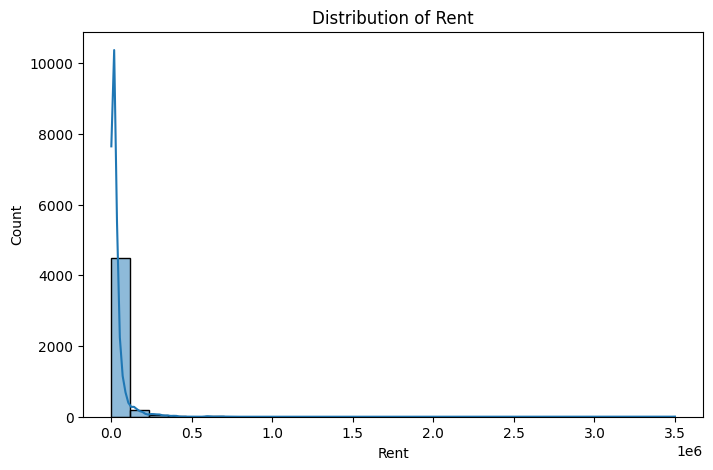

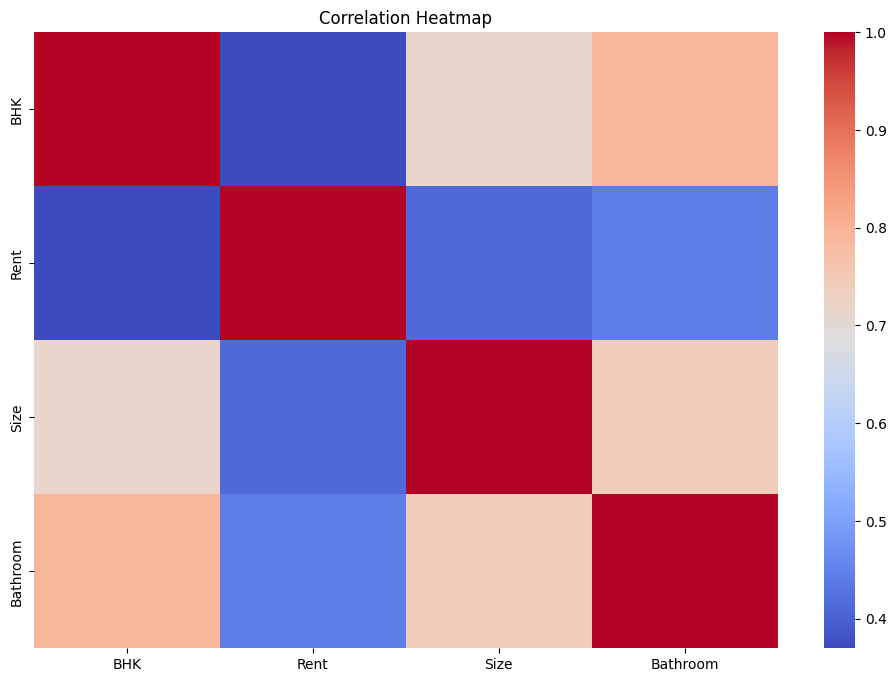

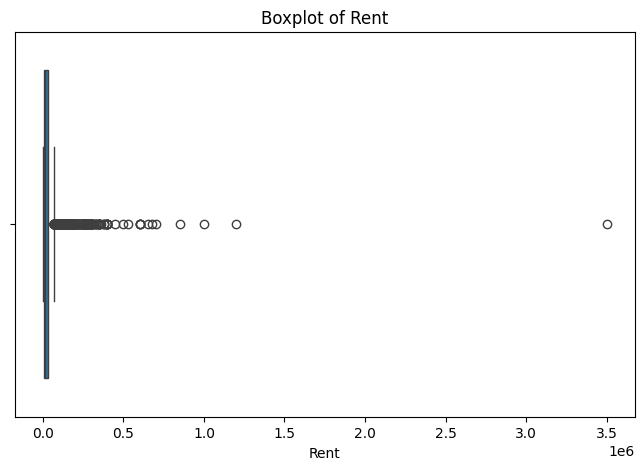

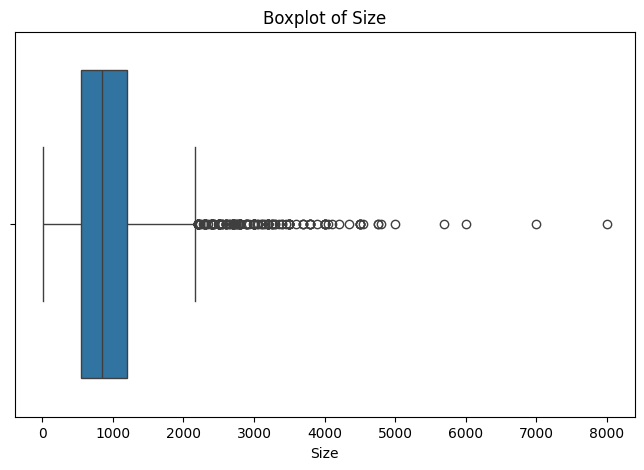

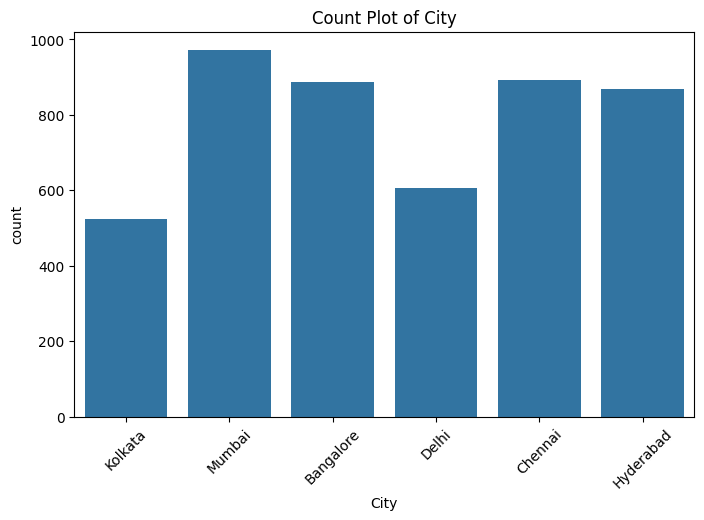

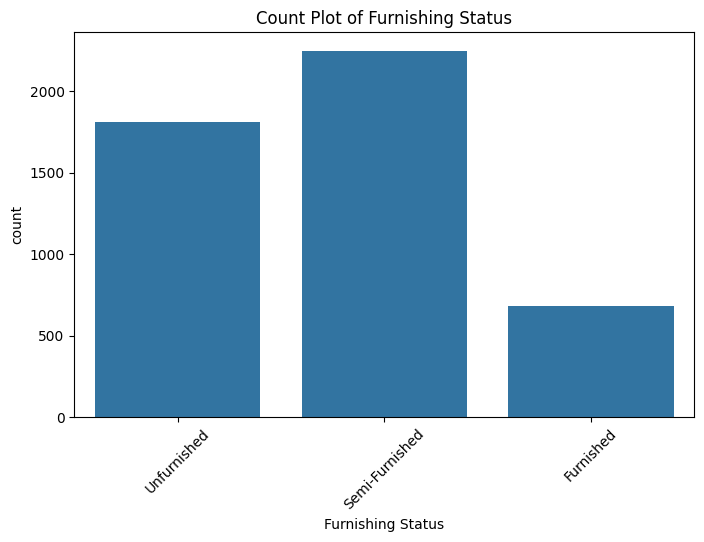

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"C:\Users\aryan\Downloads\House_Rent_Dataset.csv")

print(df.shape)
print(df.info())
print(df.head())

print("\nMissing Values per columns:")
print(df.isnull().sum())

missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=0)
plt.title("Missing Values Per Feature")
plt.show()

print("\nSummary Statistics:\n" , df.describe().T)

target = "Rent"
plt.figure(figsize=(8,5))
plt.figure(figsize=(8,5))
sns.histplot(df[target], kde=True, bins=30)
plt.title(f"Distribution of {target}")
plt.show()

plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

num_features = ["Rent", "Size"] 
for col in num_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

cat_features = ["City", "Furnishing Status"]  
for col in cat_features:
    plt.figure(figsize=(8,5))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()    